In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def getBetTime(df,t1,t2,mcolumn):
    return df[(t1 < df[mcolumn])&(df[mcolumn] < t2)].reset_index(drop=True)

def getDates1(dft):
    sal = pd.to_datetime(dft.dateStore, format="%Y-%m-%d %H:%M:%S.%f")+ timedelta(hours=5)
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.Vic_date, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','alarmas']]

def getDates2(dft):
    sal = pd.to_datetime(dft.dateStore, format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = (sal-pd.to_datetime(dft.Vic_date, format="%Y-%m-%d %H:%M:%S.%f"))/ np.timedelta64(1, 's')
    return dft[['latency in seconds','alarmas']]

In [48]:
dft25 = pd.read_csv('perfOdroid/25_6.csv')
dft25  ["alarmas"]= "25"

dft50 = pd.read_csv('perfOdroid/50_6.csv')
dft50  ["alarmas"]= "50"

dft75 = pd.read_csv('perfOdroid/75_6.csv')
dft75  ["alarmas"]= "75"

dft100 = pd.read_csv('perfOdroid/100_6.csv')
dft100  ["alarmas"]= "100"

dft125 = pd.read_csv('perfOdroid/125_6.csv')
dft125  ["alarmas"]= "125"

dft150 = pd.read_csv('perfOdroid/150_6.csv')
dft150  ["alarmas"]= "150"

dft175 = pd.read_csv('perfOdroid/175_6.csv')
dft175  ["alarmas"]= "175"

In [18]:
def Append2(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    mdtf1 = mdtf1.append(mdtf6)
    return mdtf1.append(mdtf7)

def Append(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    return mdtf1.append(mdtf5)

def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

def Plotbox(mdtf1,mcolum,morder):
    plt.rcParams['figure.dpi'] = 140
    sns.boxplot(x='alarmas', y=mcolum, data=mdtf1, order=morder)
    ax = plt.gca()
    ax.grid(True)
    plt.show()
    
def GetCutdf(mdfpost,column,signo,val):
    if signo == '<':
        return  mdfpost[mdfpost[column] < val ][[column,'alarmas']].reset_index(drop=True)
    else:
        return  mdfpost[mdfpost[column] > val ][[column,'alarmas']].reset_index(drop=True)
    
def AppendAndPlot(df1,df2,df3,df4,df5,df6,df7,
                  O_column, N_column, simbol, value, morder):
    ndf = Append2(df1, df2, df3, df4,df5,df6, df7).reset_index(drop=True)
    ndf[N_column] = CastOutLayers(ndf, O_column, simbol,value)
    Plotbox(ndf,N_column,morder)

In [19]:
morder=["25", "50", "75", "100", "125", "150", "175"]

In [51]:
dcache_load_misses50 = dft50[['dcache_load_misses','alarmas']]
dcache_load_misses50.describe()

,dcache_load_misses
count,300.000000
mean,188467.196667
std,344770.446851
min,79895.000000
25%,89588.250000
50%,96433.000000
75%,164408.750000
max,3294589.000000


In [52]:
dcache_load_misses50['aux']=CastOutLayers(dcache_load_misses50,"dcache_load_misses","<",400000)
dcache_load_misses50['aux'].describe()

/home/gio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count       300.000000
mean     142590.306667
std       90788.163187
min       79895.000000
25%       89588.250000
50%       96433.000000
75%      164408.750000
max      400000.000000
Name: aux, dtype: float64

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


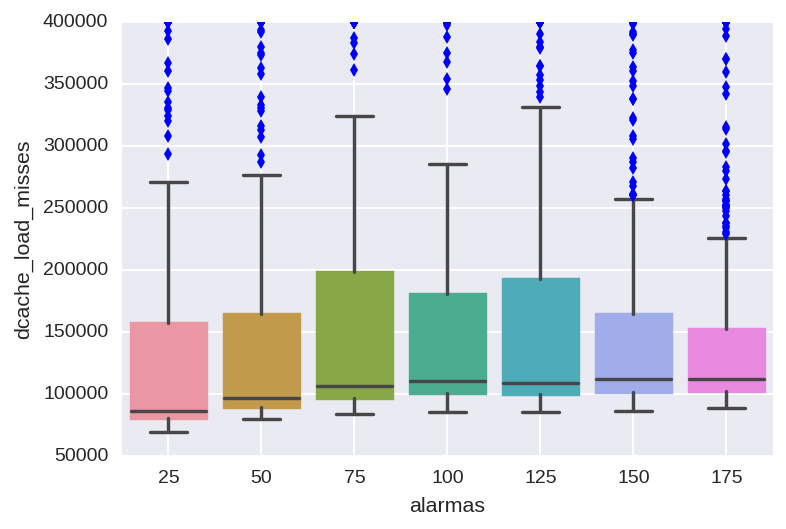

In [53]:
dcache_load_misses25 = dft25[['dcache_load_misses','alarmas']]
dcache_load_misses50 = dft50[['dcache_load_misses','alarmas']]
dcache_load_misses75 = dft75[['dcache_load_misses','alarmas']]
dcache_load_misses100 = dft100[['dcache_load_misses','alarmas']]
dcache_load_misses125 = dft125[['dcache_load_misses','alarmas']]
dcache_load_misses150 = dft150[['dcache_load_misses','alarmas']]
dcache_load_misses175 = dft175[['dcache_load_misses','alarmas']]
AppendAndPlot(dcache_load_misses25,dcache_load_misses50,dcache_load_misses75,
              dcache_load_misses100,dcache_load_misses125,dcache_load_misses150,dcache_load_misses175,
              "dcache_load_misses","dcache_load_misses","<",400000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


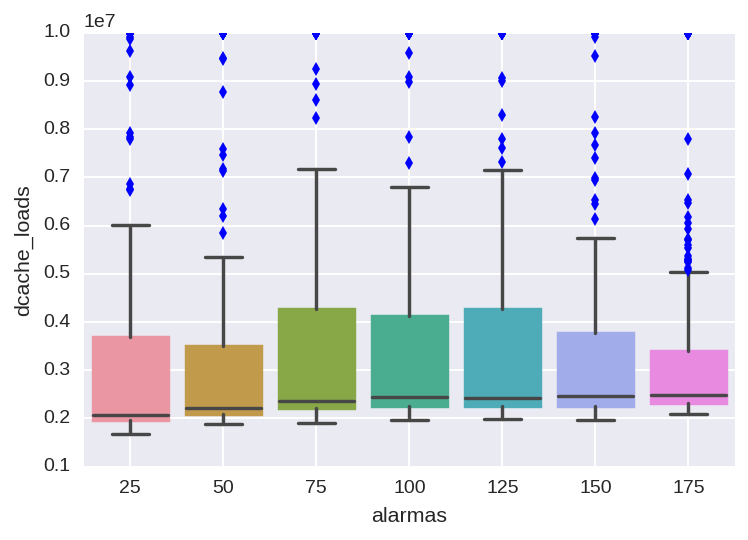

In [22]:
dcache_loads25 = dft25[['dcache_loads','alarmas']]
dcache_loads50 = dft50[['dcache_loads','alarmas']]
dcache_loads75 = dft75[['dcache_loads','alarmas']]
dcache_loads100 = dft100[['dcache_loads','alarmas']]
dcache_loads125 = dft125[['dcache_loads','alarmas']]
dcache_loads150 = dft150[['dcache_loads','alarmas']]
dcache_loads175 = dft175[['dcache_loads','alarmas']]
AppendAndPlot(dcache_loads25,dcache_loads50,dcache_loads75,
              dcache_loads100,dcache_loads125,dcache_loads150,dcache_loads175,
              "dcache_loads","dcache_loads","<",10000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


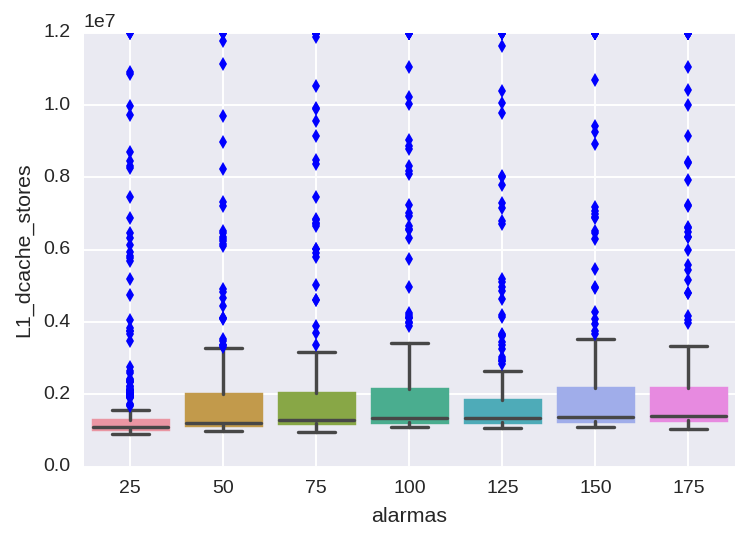

In [25]:
L1_dcache_stores25 = dft25[['L1_dcache_stores','alarmas']]
L1_dcache_stores50 = dft50[['L1_dcache_stores','alarmas']]
L1_dcache_stores75 = dft75[['L1_dcache_stores','alarmas']]
L1_dcache_stores100 = dft100[['L1_dcache_stores','alarmas']]
L1_dcache_stores125 = dft125[['L1_dcache_stores','alarmas']]
L1_dcache_stores150 = dft150[['L1_dcache_stores','alarmas']]
L1_dcache_stores175 = dft175[['L1_dcache_stores','alarmas']]
AppendAndPlot(L1_dcache_stores25,L1_dcache_stores50,L1_dcache_stores75,
              L1_dcache_stores100,L1_dcache_stores125,L1_dcache_stores150,L1_dcache_stores175,
              "L1_dcache_stores","L1_dcache_stores","<",12000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


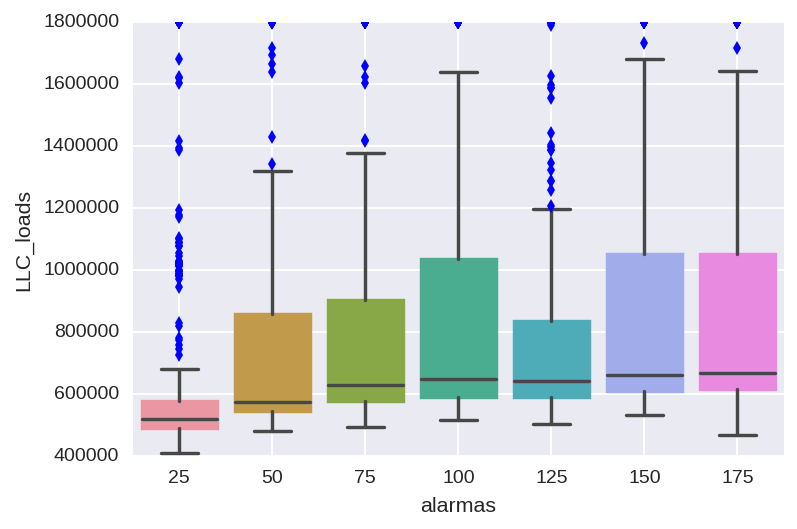

In [26]:
LLC_loads25 = dft25[['LLC_loads','alarmas']]
LLC_loads50 = dft50[['LLC_loads','alarmas']]
LLC_loads75 = dft75[['LLC_loads','alarmas']]
LLC_loads100 = dft100[['LLC_loads','alarmas']]
LLC_loads125 = dft125[['LLC_loads','alarmas']]
LLC_loads150 = dft150[['LLC_loads','alarmas']]
LLC_loads175 = dft175[['LLC_loads','alarmas']]
AppendAndPlot(LLC_loads25,LLC_loads50,LLC_loads75,
              LLC_loads100,LLC_loads125,LLC_loads150,LLC_loads175,
              "LLC_loads","LLC_loads","<",1800000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


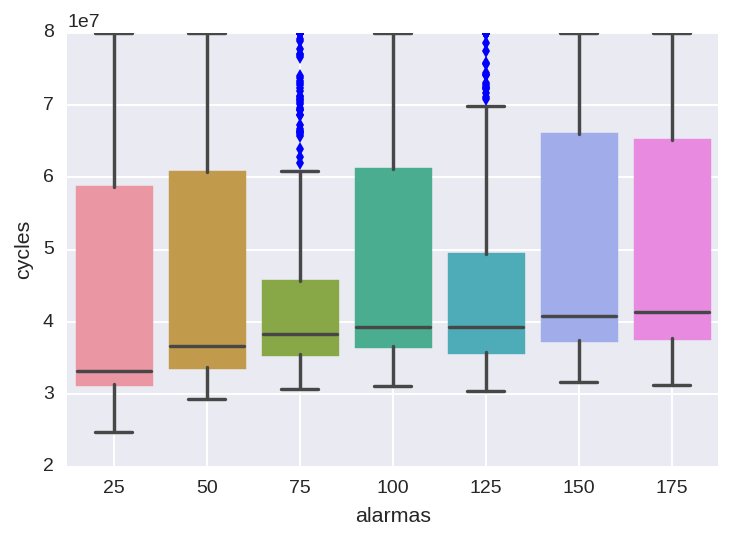

In [27]:
cycles25 = dft25[['cycles','alarmas']]
cycles50 = dft50[['cycles','alarmas']]
cycles75 = dft75[['cycles','alarmas']]
cycles100 = dft100[['cycles','alarmas']]
cycles125 = dft125[['cycles','alarmas']]
cycles150 = dft150[['cycles','alarmas']]
cycles175 = dft175[['cycles','alarmas']]
AppendAndPlot(cycles25,cycles50,cycles75,
              cycles100,cycles125,cycles150,cycles175,
              "cycles","cycles","<",80000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


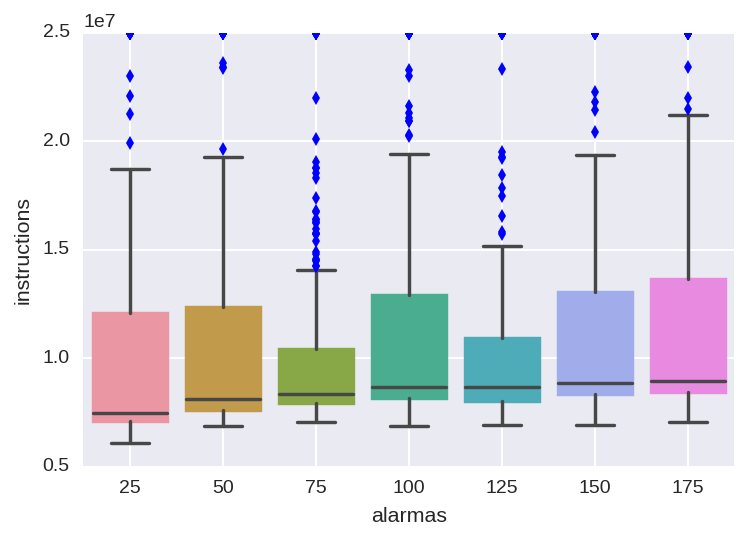

In [28]:
instructions25 = dft25[['instructions','alarmas']]
instructions50 = dft50[['instructions','alarmas']]
instructions75 = dft75[['instructions','alarmas']]
instructions100 = dft100[['instructions','alarmas']]
instructions125 = dft125[['instructions','alarmas']]
instructions150 = dft150[['instructions','alarmas']]
instructions175 = dft175[['instructions','alarmas']]
AppendAndPlot(instructions25,instructions50,instructions75,
              instructions100,instructions125,instructions150,instructions175,
              "instructions","instructions","<",25000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


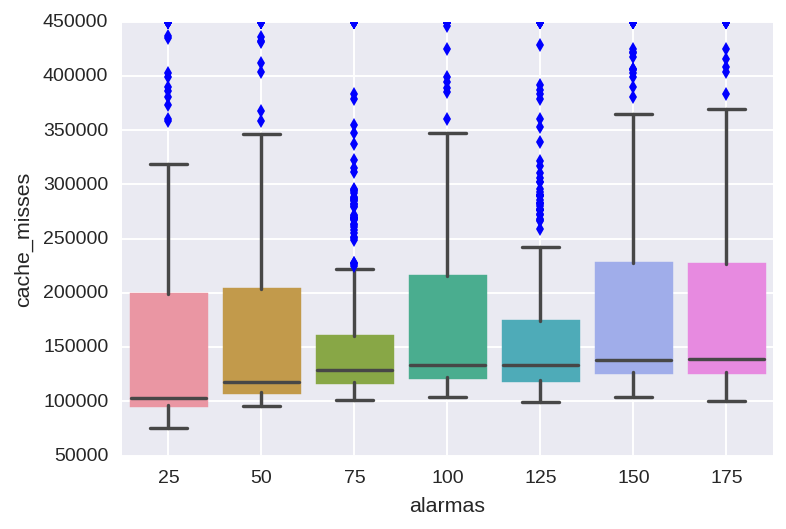

In [29]:
cache_misses25 = dft25[['cache_misses','alarmas']]
cache_misses50 = dft50[['cache_misses','alarmas']]
cache_misses75 = dft75[['cache_misses','alarmas']]
cache_misses100 = dft100[['cache_misses','alarmas']]
cache_misses125 = dft125[['cache_misses','alarmas']]
cache_misses150 = dft150[['cache_misses','alarmas']]
cache_misses175 = dft175[['cache_misses','alarmas']]
AppendAndPlot(cache_misses25,cache_misses50,cache_misses75,
              cache_misses100,cache_misses125,cache_misses150,cache_misses175,
              "cache_misses","cache_misses","<",450000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


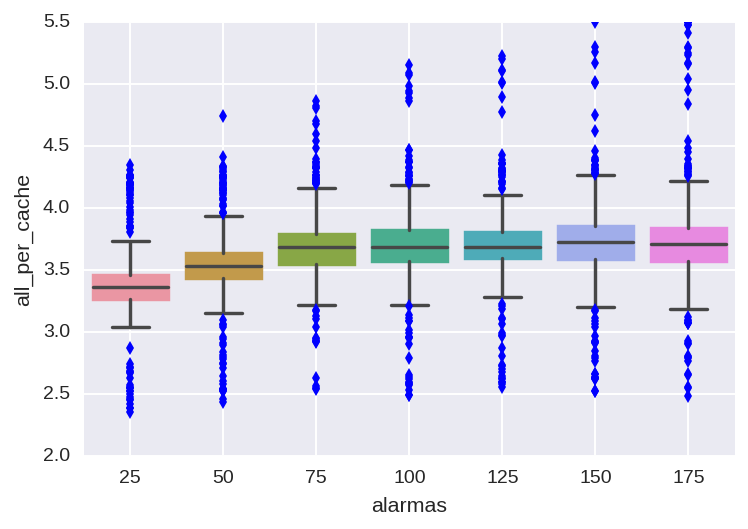

In [34]:
all_per_cache25 = dft25[['all_per_cache','alarmas']]
all_per_cache50 = dft50[['all_per_cache','alarmas']]
all_per_cache75 = dft75[['all_per_cache','alarmas']]
all_per_cache100 = dft100[['all_per_cache','alarmas']]
all_per_cache125 = dft125[['all_per_cache','alarmas']]
all_per_cache150 = dft150[['all_per_cache','alarmas']]
all_per_cache175 = dft175[['all_per_cache','alarmas']]
AppendAndPlot(all_per_cache25,all_per_cache50,all_per_cache75,
              all_per_cache100,all_per_cache125,all_per_cache150,all_per_cache175,
              "all_per_cache","all_per_cache","<",5.5,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


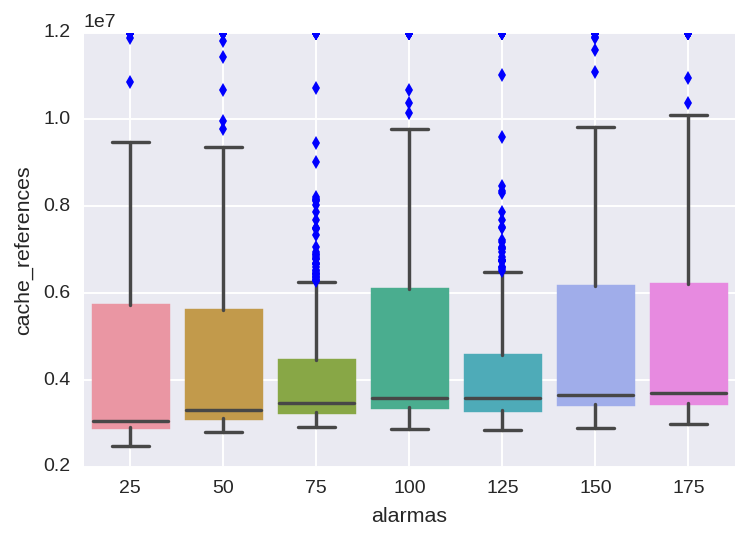

In [31]:
cache_references25 = dft25[['cache_references','alarmas']]
cache_references50 = dft50[['cache_references','alarmas']]
cache_references75 = dft75[['cache_references','alarmas']]
cache_references100 = dft100[['cache_references','alarmas']]
cache_references125 = dft125[['cache_references','alarmas']]
cache_references150 = dft150[['cache_references','alarmas']]
cache_references175 = dft175[['cache_references','alarmas']]
AppendAndPlot(cache_references25,cache_references50,cache_references75,
              cache_references100,cache_references125,cache_references150,cache_references175,
              "cache_references","cache_references","<",12000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


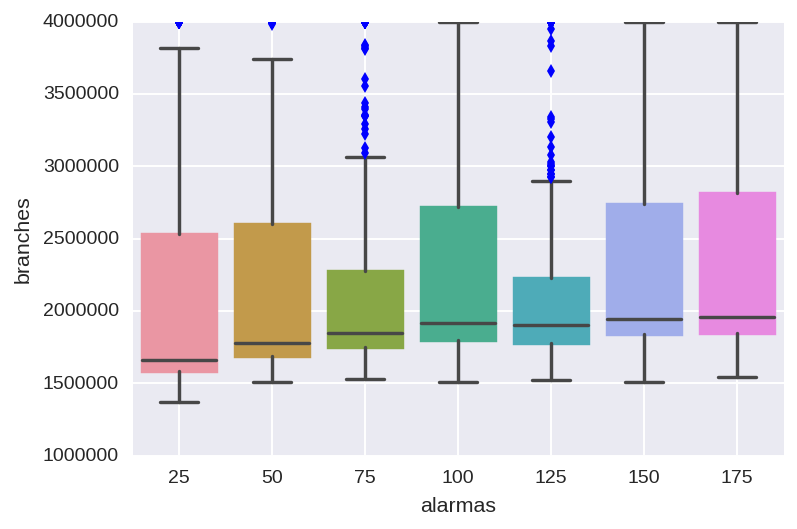

In [32]:
branches25 = dft25[['branches','alarmas']]
branches50 = dft50[['branches','alarmas']]
branches75 = dft75[['branches','alarmas']]
branches100 = dft100[['branches','alarmas']]
branches125 = dft125[['branches','alarmas']]
branches150 = dft150[['branches','alarmas']]
branches175 = dft175[['branches','alarmas']]
AppendAndPlot(branches25,branches50,branches75,
              branches100,branches125,branches150,branches175,
              "branches","branches","<",4000000,morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


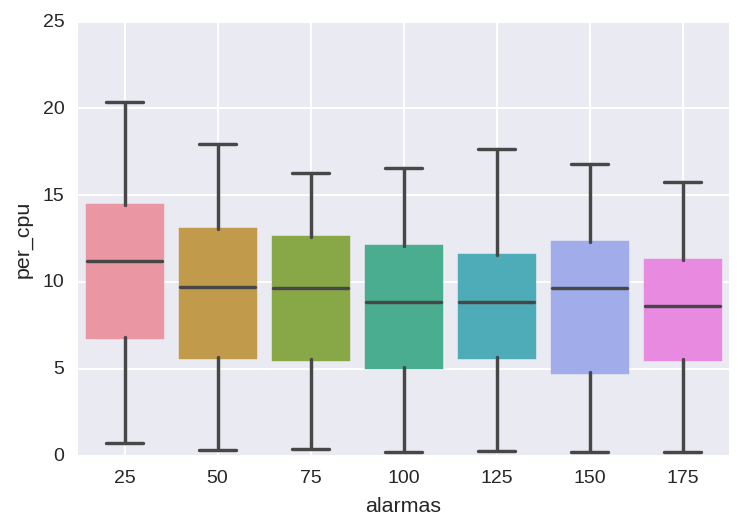

In [33]:
per_cpu25 = dft25[['per_cpu','alarmas']]
per_cpu50 = dft50[['per_cpu','alarmas']]
per_cpu75 = dft75[['per_cpu','alarmas']]
per_cpu100 = dft100[['per_cpu','alarmas']]
per_cpu125 = dft125[['per_cpu','alarmas']]
per_cpu150 = dft150[['per_cpu','alarmas']]
per_cpu175 = dft175[['per_cpu','alarmas']]
AppendAndPlot(per_cpu25,per_cpu50,per_cpu75,
              per_cpu100,per_cpu125,per_cpu150,per_cpu175,
              "per_cpu","per_cpu","<",40,morder)